In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wave
%matplotlib inline 

In [2]:
def signal_chirp(amp=1.0, freq=0.0, beta=0.25, period=100, **kwargs):
    """
    Create Chirp signal

    Parameters
    ----------
    amp : float
        Signal magnitude
    beta : float
        Modulation bandwidth: beta < N for complex, beta < 0.5N for real
    freq : float or int
        Linear frequency of signal
    period : integer
        Number of points for signal (same as period)
    kwargs : bool
        Complex signal if is_complex = True
        Modulated by half-sine wave if is_modsine = True
    """
    is_complex = kwargs.get('is_complex', False)
    is_modsine = kwargs.get('is_modsine', False)

    t = np.linspace(0, 1, period)
    tt = np.pi * (freq * t + beta * t ** 2)
    
    if is_complex is True:
        res = amp * (np.cos(tt) + 1j * np.sin(tt))
    else:
        res = amp * np.cos(tt)

    if is_modsine is True:
        return res * np.sin(np.pi * t)
    return res

In [3]:
SR = 1000
#x = np.linspace(np.pi, 7*np.pi, SR)
x = np.linspace(0, 10, SR)

noise = np.random.uniform(-1.,1., SR)      
y = np.sin(x)# + 0.04*noise 
#y = np.sin(5*x) *0.5*np.sin(20*x) * 0.2*np.sin(60*x)# + 0.001*noise 


In [5]:
fm = signal_chirp(freq=11, beta=15.9, period=1000)
fm1 = signal_chirp(freq=7, beta=15.9, period=1000)

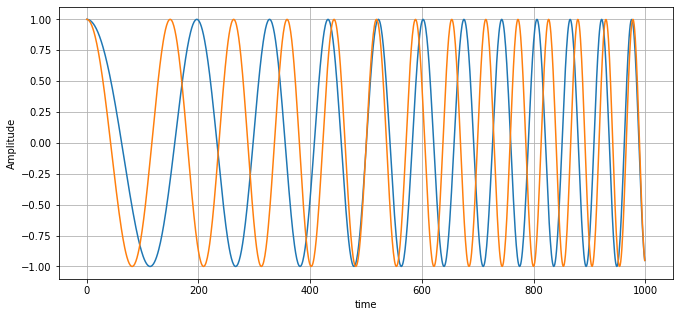

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(11, 5))
plt.ylabel('Amplitude')
plt.xlabel('time')
plt.grid(True, which='both')
plt.plot(fm1, label='orig')
plt.plot(fm, label='recovery')


In [7]:
y = fm
SR = 1000

N = SR
spectrum = np.fft.rfft(y)
orig = spectrum.copy()
freq = np.fft.rfftfreq(N, 1./SR)/4 #Frequency axis
spectrum = 1/N * np.abs(spectrum)
spectrum[1:] = spectrum[1:]*2

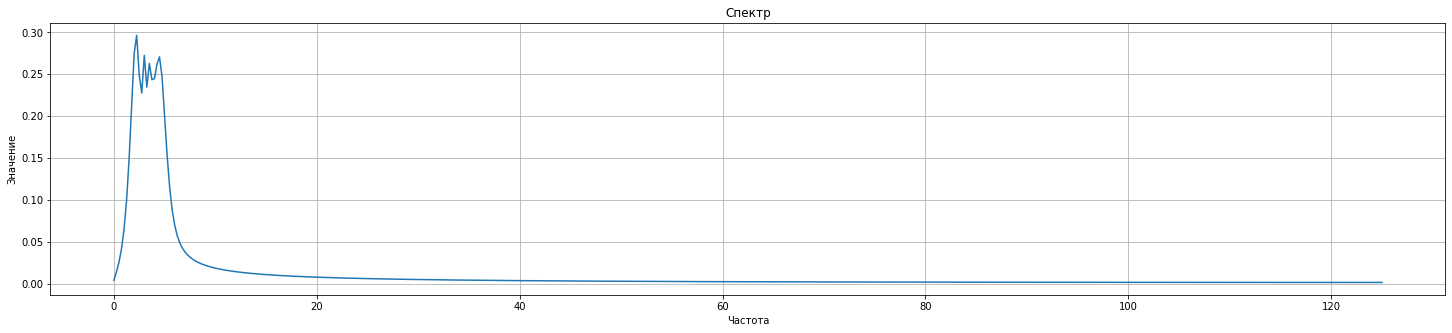

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(25, 5))
plt.plot(freq, spectrum)
# rfftfreq сделает всю работу по преобразованию номеров элементов массива в частоту
# интересует только спектр амплитуд, поэтому используем abs из numpy (действует на массивы поэлементно)
# делим на число элементов, чтобы скорректировать амплитуду. Постоянные составляющие должны совпадать в смоделированном гармоническом сигнале и в спектре
plt.xlabel(u'Частота')
plt.ylabel(u'Значение')
plt.title(u'Спектр')
plt.grid(True)
plt.show()

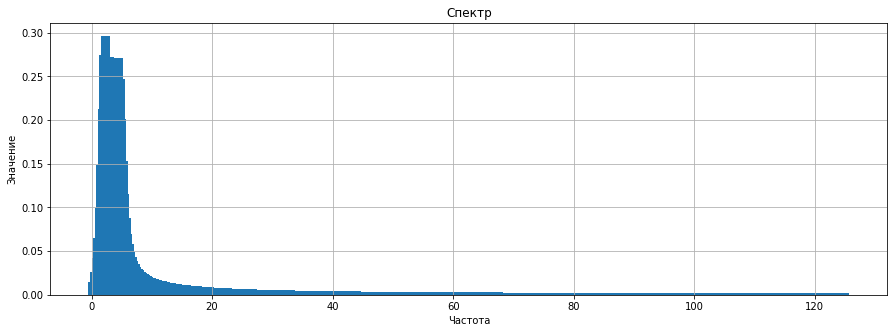

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
plt.bar(freq[1:], spectrum[1:] , width=1.5)
plt.xlabel(u'Частота')
plt.ylabel(u'Значение')
plt.title(u'Спектр')
plt.grid(True)
plt.show()

In [9]:
s = np.fft.irfft(orig)

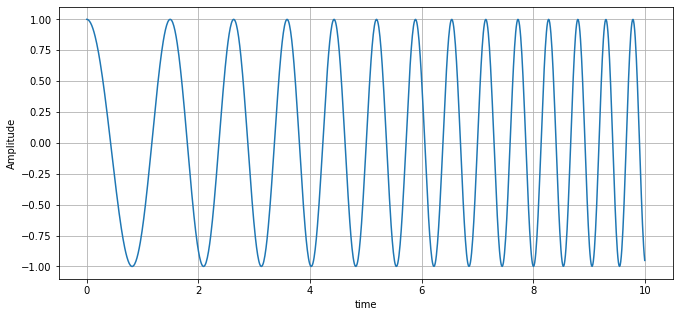

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(11, 5))
plt.ylabel('Amplitude')
plt.xlabel('time')
plt.grid(True, which='both')
plt.plot(x, s, label='recovery')

In [400]:
orig_wo_noise = spectrum.copy()
orig_wo_noise[orig_wo_noise < 0.04] = 0.

orig_wo_noise.shape, spectrum.shape

((501,), (501,))

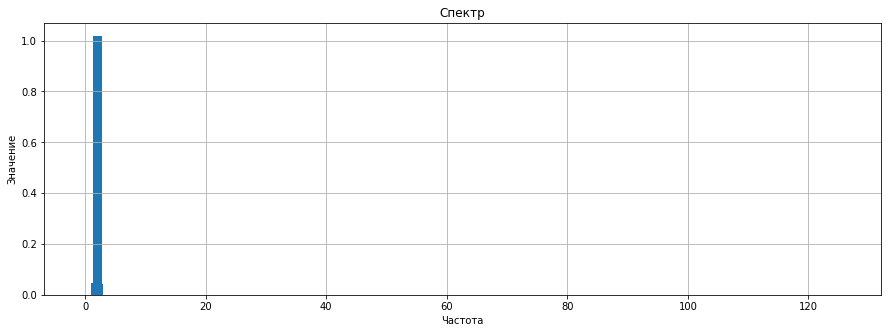

In [441]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.bar(freq[1:], orig_wo_noise[1:] , width=1.5)
plt.xlabel(u'Частота')
plt.ylabel(u'Значение')
plt.title(u'Спектр')
plt.grid(True)
plt.show()

In [78]:
s_ = np.fft.irfft(orig_wo_noise)

NameError: name 'orig_wo_noise' is not defined

In [92]:
noise = np.random.uniform(-1.,1., SR) 
y1 = np.sin(x) + 0.0*noise
y2 = np.sin(3*x) + 0.0*noise
y12 = np.column_stack((y1, y2))
y1_ = y1.reshape(40, 25, 1)
y1_.shape

(40, 25, 1)

In [50]:
n = 5
y = np.zeros(1000)
for i in range(1, n):
    y_ = np.sin(x*0.99*i)
    if i%3 == 0:
        y_ = np.sign(y_)
    y = np.column_stack((y, y_))         
y = y[:,-(n-1):]
y.shape

(1000, 4)

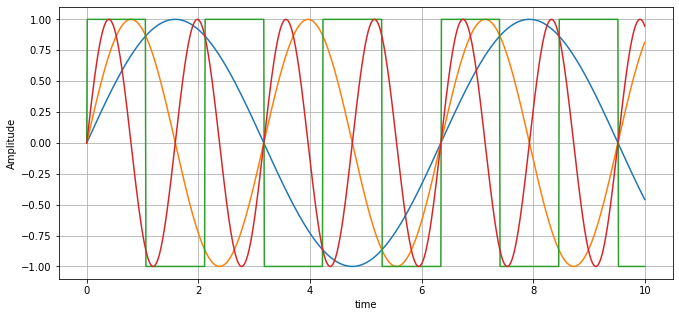

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(11, 5))
plt.ylabel('Amplitude')
plt.xlabel('time')
plt.grid(True, which='both')
plt.plot(x, y, label='recovery')
#plt.plot(x, y[:,-4:], label='recovery')


(1000, 7)

In [69]:
y1_dn = np.sin(x)
y2_dn = np.sin(3*x) 
y12_dn = np.column_stack((y1_dn, y2_dn))
y12_dn = y12_dn.reshape(40, 25, 2)
y12_dn.shape

(40, 25, 2)

In [79]:
y1.shape

(1000,)

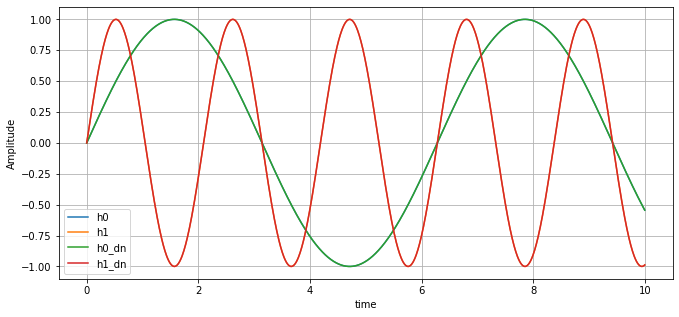

In [70]:
h1 = (y12_[:, :, 0]).flatten()
h2 = (y12_[:, :, 1]).flatten()

h1_dn = (y12_dn[:, :, 0]).flatten()
h2_dn = (y12_dn[:, :, 1]).flatten()

fig, ax = plt.subplots(1, 1, figsize=(11, 5))
plt.ylabel('Amplitude')
plt.xlabel('time')
plt.grid(True, which='both')
plt.plot(x, h1, label='h0')
plt.plot(x, h2, label='h1')
plt.plot(x, h1_dn, label='h0_dn')
plt.plot(x, h2_dn, label='h1_dn')
plt.legend()


In [71]:
z = s_autoencoder.predict(y12_)
z1 = (z[:, :, 0]).flatten()
z2 = (z[:, :, 1]).flatten()
fig, ax = plt.subplots(1, 1, figsize=(11, 5))
plt.ylabel('Amplitude')
plt.xlabel('time')
plt.grid(True, which='both')
plt.plot(z1, label='recovery', lw=1)
plt.plot(z2, label='recovery', lw=1)

NameError: name 's_autoencoder' is not defined

In [149]:
import tensorflow as tf
import keras
import keras.models as M
import keras.layers as L
import keras.activations
import keras.backend as K
from keras.callbacks import Callback
from keras.layers import Input, Dense, LSTM, MaxPooling1D, Conv1D
from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model

print(tf.__version__)
print(keras.__version__)

1.14.0
2.3.1


In [12]:
from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model

def create_dense_ae():
    # Размерность кодированного представления
    encoding_dim = 11

    # Энкодер
    # Входной плейсхолдер
    input_img = Input(shape=(25, 1, )) # 28, 28, 1 - размерности строк, столбцов, фильтров одной картинки, без батч-размерности
    # Вспомогательный слой решейпинга
    flat_img = Flatten()(input_img)
    # Кодированное полносвязным слоем представление
    encoded = Dense(encoding_dim, activation='relu')(flat_img)
    
    # Декодер
    # Раскодированное другим полносвязным слоем изображение
    input_encoded = Input(shape=(encoding_dim,))
    flat_decoded = Dense(25, activation='sigmoid')(input_encoded)
    flat_decoded = Dense(25, activation='linear')(flat_decoded)
    decoded = Reshape((25, 1, ))(flat_decoded)

    # Модели, в конструктор первым аргументом передаются входные слои, а вторым выходные слои
    # Другие модели можно так же использовать как и слои
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

encoder, decoder, autoencoder = create_dense_ae()
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 25, 1)             0         
_________________________________________________________________
encoder (Model)              (None, 11)                286       
_________________________________________________________________
decoder (Model)              (None, 25, 1)             950       
Total params: 1,236
Trainable params: 1,236
Non-trainable params: 0
_________________________________________________________________


In [108]:
from keras.regularizers import L1L2

def create_sparse_ae():
    
    encoding_dim = 11
    lambda_l1 = 1e-2
    
    
    
    
    # Энкодер
    input_img = Input(shape=(25,1, ))
    flat_img = Flatten()(input_img)
    x = Dense(encoding_dim*3, activation='elu')(flat_img)
    x = Dense(encoding_dim*2, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='linear', activity_regularizer=L1L2(lambda_l1))(x)
    
    # Декодер
    input_encoded = Input(shape=(encoding_dim,))
    x = Dense(encoding_dim*2, activation='elu')(input_encoded)
    x = Dense(encoding_dim*3, activation='elu')(x)
    
    flat_decoded = Dense(25, activation='elu')(input_encoded)
    flat_decoded = Dense(25, activation='linear')(flat_decoded)
    decoded = Reshape((25, 1, ))(flat_decoded)

    
    
    # Модели
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="s_autoencoder")
    return encoder, decoder, autoencoder

s_encoder, s_decoder, s_autoencoder = create_sparse_ae()
#s_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
s_autoencoder.summary()

Model: "s_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 25, 1)             0         
_________________________________________________________________
encoder (Model)              (None, 11)                1859      
_________________________________________________________________
decoder (Model)              (None, 25, 1)             950       
Total params: 2,809
Trainable params: 2,809
Non-trainable params: 0
_________________________________________________________________


In [291]:
from keras.layers import Conv1D, MaxPooling1D, UpSampling1D

def create_deep_conv_ae():
    input_img = Input(shape=(100, 1))

    x = Conv1D(32, 10, activation='elu', padding='same')(input_img)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(16, 5, activation='elu', padding='same')(x)
    x = MaxPooling1D(2, padding='same')(x)
    encoded = Conv1D(1, 25, activation='elu', padding='same')(x)

    # На этом моменте представление  (7, 7, 1) т.е. 49-размерное

    input_encoded = Input(shape=(25, 1))
    x = Conv1D(16, 5, activation='elu', padding='same')(input_encoded)
    x = UpSampling1D(2)(x)
    x = Conv1D(32, 10, activation='elu', padding='same')(x)
    x = UpSampling1D(2)(x)
    decoded = Conv1D(1, 100, activation='elu', padding='same')(x)
    decoded = Conv1D(1, 100, activation='linear', padding='same')(decoded)

    # Модели
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

con_encoder, con_decoder, con_autoencoder = create_deep_conv_ae()
#con_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

con_autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_46 (InputLayer)        (None, 100, 1)            0         
_________________________________________________________________
encoder (Model)              (None, 25, 1)             3329      
_________________________________________________________________
decoder (Model)              (None, 100, 1)            8550      
Total params: 11,879
Trainable params: 11,879
Non-trainable params: 0
_________________________________________________________________


In [292]:
#sequence_autoencoder.compile(optimizer='adam', loss='mse')
#autoencoder.compile(optimizer='adam', loss='mse')
#s_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
con_autoencoder.compile(optimizer='adam', loss='mse')
#autoencoder.compile(optimizer='adam', loss='mse')

In [296]:
con_autoencoder.fit(signal_fr, signal_fr,
                epochs=10,
                batch_size=20,
                shuffle=True)
                #validation_data=(X_norm_val, X_norm_val))

Epoch 1/10
4400/4400 [==============================] - 2s 441us/step - loss: 13397946.0864
Epoch 2/10
4400/4400 [==============================] - 2s 441us/step - loss: 13197928.6500
Epoch 3/10
4400/4400 [==============================] - 2s 507us/step - loss: 12753856.2250
Epoch 4/10
4400/4400 [==============================] - 2s 434us/step - loss: 12756530.1409
Epoch 5/10
4400/4400 [==============================] - 2s 505us/step - loss: 12433831.8227
Epoch 6/10
4400/4400 [==============================] - 2s 434us/step - loss: 12323200.9205
Epoch 7/10
4400/4400 [==============================] - 2s 502us/step - loss: 12332547.0750
Epoch 8/10
4400/4400 [==============================] - 2s 436us/step - loss: 12219674.1227
Epoch 9/10
4400/4400 [==============================] - 2s 502us/step - loss: 12189056.6091
Epoch 10/10
4400/4400 [==============================] - 2s 430us/step - loss: 11798650.7193


In [17]:
import numpy as np
from scipy.io import wavfile
from scipy.io.wavfile import write

In [269]:
frequency_sampling, speech_signal = wavfile.read("/Documents/Аудиозаписи/Запись.wav")
frequency_sampling, audio_signal_1 = wavfile.read("/Documents/Аудиозаписи/sin400_10.wav")
frequency_sampling, audio_signal_2 = wavfile.read("/Documents/Аудиозаписи/sin800_10.wav")
frequency_sampling, audio_signal_fr = wavfile.read("/Documents/Аудиозаписи/200-800_10.wav")

C:\Users\SSD_DK\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [153]:
print('\nSignal shape:', audio_signal.shape)
print('Signal Datatype:', audio_signal.dtype)
print(frequency_sampling)
print('Signal duration:', round(audio_signal.shape[0] / 
float(frequency_sampling), 2), 'seconds')


Signal shape: (441000,)
Signal Datatype: int16
44100
Signal duration: 10.0 seconds


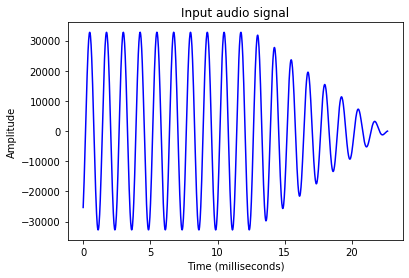

In [98]:
signal = audio_signal_2 [-1000:]
time_axis = 1000 * np.arange(0, len(signal), 1) / float(frequency_sampling)

plt.plot(time_axis, signal, color='blue')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

In [225]:
speech_signal.shape
#440000/2000

(220160,)

In [270]:
signal_1 = audio_signal_1[:440000].reshape(4400, 100, 1)
signal_2 = audio_signal_2[:440000].reshape(4400, 100, 1)
signal_fr = audio_signal_fr[:440000].reshape(4400, 100, 1)
signal_1.shape, signal_fr.shape,

((4400, 100, 1), (4400, 100, 1))

In [284]:
speech_signal = speech_signal[:220100].reshape(2201, 100, 1)
speech_signal.shape

(2201, 100, 1)

In [297]:
#z_1 = con_autoencoder.predict(signal_1)
z_fr = con_autoencoder.predict(signal_fr)
#sp = con_autoencoder.predict(speech_signal)
z_fr.shape

(4400, 100, 1)

In [298]:
#x = signal.reshape(441000,1)
#z_1 = z_1.reshape(440000,1)
z_fr = z_fr.reshape(440000,1)
sp = sp.reshape(220100, 1)
z_1.shape

(440000, 1)

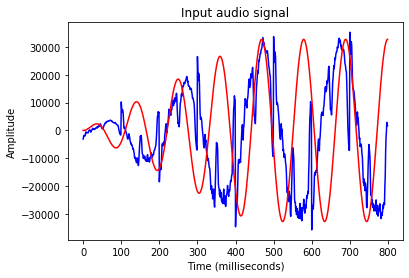

In [299]:
plt.plot(z_fr[:800], color='blue')
plt.plot(audio_signal_1[:800], color='red')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

In [288]:
output_file = '/Documents/Аудиозаписи/speech_z_.wav'
write(output_file, frequency_sampling, sp)

In [152]:
signal.shape
x = signal.reshape(100000,1)
x.shape

(100000, 1)